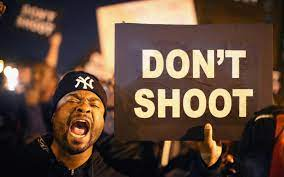

#IMPORTING ALL THE NECESSARY LIBRARIES.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

# **INTRODUCTION**
This dataset contains the  lists of people killed by law enforcement in the United States, both on duty and off duty.

According to The Counted Around 2015–2016, The Guardian newspaper ran its own database, The Counted, which tracked US killings by police and other law enforcement agencies including from gunshots, tasers, car accidents and custody deaths. In 2015 they counted 1,146 deaths and 1,093 deaths for 2016. The database can be viewed by state, gender, race/ethnicity, age, classification (e.g., "gunshot"), and whether the person killed was armed.
It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect.


#**DATA PREPROCESSING**

## READING THE DATASET

In [ ]:
usps = pd.read_csv("/content/dataset.csv")

## DESCRIBING AND UNDERSTANDING THE DATA

In [ ]:
usps.shape

(7682, 17)

In [ ]:
usps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   armed                    7473 non-null   object 
 5   age                      7210 non-null   float64
 6   gender                   7663 non-null   object 
 7   race                     6244 non-null   object 
 8   city                     7682 non-null   object 
 9   state                    7682 non-null   object 
 10  signs_of_mental_illness  7682 non-null   bool   
 11  threat_level             7682 non-null   object 
 12  flee                     6819 non-null   object 
 13  body_camera              7682 non-null   bool   
 14  longitude               

In [ ]:
usps.describe()

,id,age,longitude,latitude
count,7682.000000,7210.000000,6847.000000,6847.000000
mean,3841.500000,37.161997,-97.057301,36.668453
std,2217.746717,12.951797,16.593304,5.394855
min,1.000000,2.000000,-160.007000,19.498000
25%,1921.250000,27.000000,-112.040500,33.478500
50%,3841.500000,35.000000,-94.249000,36.095000
75%,5761.750000,45.000000,-83.080500,40.026500
max,7682.000000,92.000000,-67.867000,71.301000


In [ ]:
usps.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,02-01-2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,02-01-2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,03-01-2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,04-01-2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,04-01-2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,04-01-2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,05-01-2015,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,06-01-2015,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,06-01-2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,06-01-2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [ ]:
usps.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

## CHECKING FOR NULL VALUES

In [ ]:
usps.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
7678,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7679,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
7680,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
usps.isna().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

There are null values present in many columns

In [ ]:
usps.isna().sum().sum()

5078

In [ ]:
usps.isna().sum()/usps.shape[0]*100

id                          0.000000
name                        5.298099
date                        0.000000
manner_of_death             0.000000
armed                       2.720646
age                         6.144233
gender                      0.247331
race                       18.719084
city                        0.000000
state                       0.000000
signs_of_mental_illness     0.000000
threat_level                0.000000
flee                       11.234054
body_camera                 0.000000
longitude                  10.869565
latitude                   10.869565
is_geocoding_exact          0.000000
dtype: float64

Checking the percentage of null values present in each columns

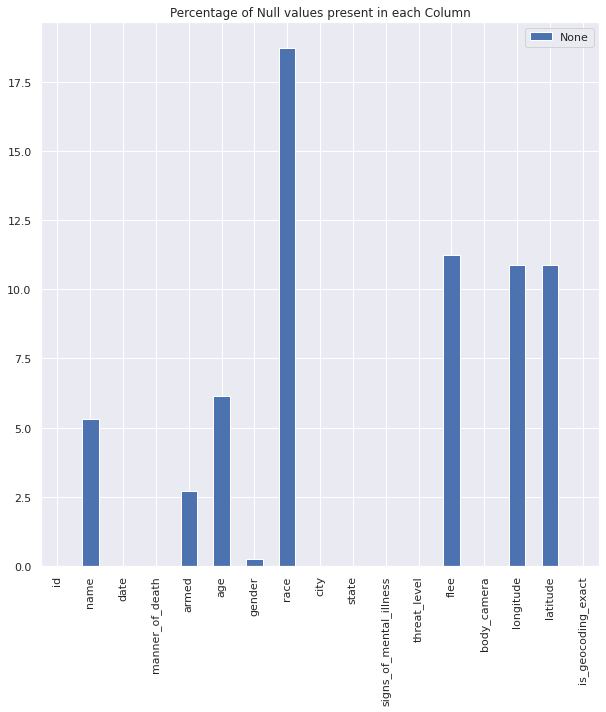

In [ ]:
null = usps.isnull().sum()/usps.shape[0]*100
null.plot(kind='bar',y="%age of null values",figsize=(10,10),legend=True)
plt.title("Percentage of Null values present in each Column")
plt.show()

In [ ]:
usps.nunique()

id                         7682
name                       7241
date                       2604
manner_of_death               2
armed                       103
age                          81
gender                        2
race                          6
city                       3142
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5998
latitude                   5298
is_geocoding_exact            2
dtype: int64

## DIFFERENT METHODS OF REMOVING NULL VALUES

DROPPING COLUMN WHICH ARE OF NO USE

In [ ]:
usps.drop(["id","name"],axis=1,inplace=True)

In [ ]:
usps.head(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,02-01-2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,02-01-2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,03-01-2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,04-01-2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,04-01-2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,04-01-2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,05-01-2015,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,06-01-2015,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,06-01-2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,06-01-2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [ ]:
usps.isna().sum()

date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

FILLING THE NULL VALUES WITH THE MEAN OF THE COLUMN

In [ ]:
usps["age"].fillna(usps["age"].mean(),inplace=True)
usps.isna().sum()

date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

FILLING ALL THE NULL VALUES OF ARMED COLUMN WITH 'UNDETERMINED'.

In [ ]:
usps["armed"].fillna("undetermined",inplace=True)
usps.isna().sum()

date                          0
manner_of_death               0
armed                         0
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [ ]:
usps.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,02-01-2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,02-01-2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,03-01-2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,04-01-2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,04-01-2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
newdf=usps.copy()

DROPPING ALL THE COLUMNS IN THE COPY OF DATAFRAME WHICH HAS NO NULL VALUES.

In [ ]:
newdf.drop("date",axis=1,inplace=True)
newdf.drop("armed",axis=1,inplace=True)
newdf.drop("manner_of_death",axis=1,inplace=True)
newdf.drop("city",axis=1,inplace=True)
newdf.drop("state",axis=1,inplace=True)
newdf.drop("signs_of_mental_illness",axis=1,inplace=True)
newdf.drop("threat_level",axis=1,inplace=True)
newdf.drop("body_camera",axis=1,inplace=True)
newdf.drop("longitude",axis=1,inplace=True)
newdf.drop("latitude",axis=1,inplace=True)
newdf.drop("is_geocoding_exact",axis=1,inplace=True)

newdf.head(10)

,age,gender,race,flee
0,53.0,M,A,Not fleeing
1,47.0,M,W,Not fleeing
2,23.0,M,H,Not fleeing
3,32.0,M,W,Not fleeing
4,39.0,M,H,Not fleeing
5,18.0,M,W,Not fleeing
6,22.0,M,H,Car
7,35.0,M,W,Not fleeing
8,34.0,F,W,Not fleeing
9,47.0,M,B,Not fleeing


In [ ]:
newdf.columns

Index(['age', 'gender', 'race', 'flee'], dtype='object')

FILLING THE NULL VALUES THROUGH CATEGORICAL IMPUTATION

In [ ]:
from sklearn_pandas import CategoricalImputer


imputer = CategoricalImputer()


data1 = np.array(newdf['race'], dtype=object)
data_1=imputer.fit_transform(data1)


data2 = np.array(newdf['flee'], dtype=object)
data_2=imputer.fit_transform(data2)

data3 = np.array(newdf['gender'], dtype=object)
data_3=imputer.fit_transform(data3)


df1 = pd.DataFrame(data_1, columns =['race_new'])
df2 = pd.DataFrame(data_2, columns =['flee_new'])
df3 = pd.DataFrame(data_3, columns =['gender_new'])

df4 = pd.concat([df1, df2, df3], axis=1)

df4

,race_new,flee_new,gender_new
0,A,Not fleeing,M
1,W,Not fleeing,M
2,H,Not fleeing,M
3,W,Not fleeing,M
4,H,Not fleeing,M
...,...,...,...
7677,W,Foot,M
7678,W,Not fleeing,M
7679,W,Not fleeing,M
7680,W,Foot,M


UPDATING THE ORIGINAL DATAFRAME WITH THE IMPUTED VALUES.

In [ ]:
usps["gender"]=df4["gender_new"]
usps["race"]=df4["race_new"]
usps["flee"]=df4["flee_new"]

usps.tail(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
7672,21-08-2022,shot,vehicle,17.000000,M,W,Greensboro,NC,False,attack,Car,False,-79.872,36.069,True
7673,22-08-2022,shot,knife,37.000000,M,W,Olympia,WA,False,attack,Not fleeing,False,-122.844,47.047,True
7674,22-08-2022,shot,undetermined,42.000000,F,W,Biloxi,MS,False,undetermined,Not fleeing,False,-88.900,30.406,True
7675,22-08-2022,shot,knife,37.161997,M,W,Sparks,NV,False,undetermined,Not fleeing,False,-119.763,39.544,True
7676,22-08-2022,shot,gun,41.000000,F,W,Butler Township,OH,False,attack,Not fleeing,False,-82.237,40.379,True
7677,23-08-2022,shot,unknown weapon,37.161997,M,W,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,23-08-2022,shot,machete,48.000000,M,W,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,23-08-2022,shot,gun,32.000000,M,W,Cut Off,LA,False,attack,Not fleeing,False,-90.312,29.458,True
7680,23-08-2022,shot,gun,37.161997,M,W,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True
7681,23-08-2022,shot,undetermined,37.161997,M,B,Splendora,TX,False,undetermined,Car,False,-95.166,30.229,True


In [ ]:
usps.isna().sum()

date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  835
latitude                   835
is_geocoding_exact           0
dtype: int64

## ADDING AND MODIFYING THE COLUMNS OF THE DATASETS

In [ ]:
usps['date'] = pd.to_datetime(usps['date'])

usps['Month'] = pd.DatetimeIndex(usps['date']).month
usps['Year'] = pd.DatetimeIndex(usps['date']).year
usps['Month_Name']=usps['date'].dt.strftime('%B')
usps['Month_Number']=usps['date'].dt.strftime('%m')
usps['Day']=usps['date'].dt.strftime('%A')
usps['Yearly_Quarters'] =usps.date.dt.to_period("Q")
usps['Date_Number']=usps['date'].dt.strftime('%d').astype(int)
usps['Date_Category']=np.where(usps['Date_Number']<11,"First Third",np.where((usps['Date_Number']>=11) & (usps['Date_Number'] < 20),"Second Third",'Last Third'))

usps['race_name']=np.where(usps['race']=='W','White',np.where(usps['race']=='B','Black',
np.where(usps['race']=='N','Native American',np.where(usps['race']=='H','Hispanic',
np.where(usps['race']=='A','Asian',np.where(usps['race']=='O','Others','Not Specified'))))))
usps

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
0,2015-02-01,shot,gun,53.000000,M,A,Shelton,WA,True,attack,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,Asian
1,2015-02-01,shot,gun,47.000000,M,W,Aloha,OR,False,attack,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,White
2,2015-03-01,shot and Tasered,unarmed,23.000000,M,H,Wichita,KS,False,other,...,True,3,2015,March,03,Sunday,2015Q1,1,First Third,Hispanic
3,2015-04-01,shot,toy weapon,32.000000,M,W,San Francisco,CA,True,attack,...,True,4,2015,April,04,Wednesday,2015Q2,1,First Third,White
4,2015-04-01,shot,nail gun,39.000000,M,H,Evans,CO,False,attack,...,True,4,2015,April,04,Wednesday,2015Q2,1,First Third,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,2022-08-23,shot,unknown weapon,37.161997,M,W,Harris County,TX,False,other,...,True,8,2022,August,08,Tuesday,2022Q3,23,Last Third,White
7678,2022-08-23,shot,machete,48.000000,M,W,San Diego,CA,False,other,...,True,8,2022,August,08,Tuesday,2022Q3,23,Last Third,White
7679,2022-08-23,shot,gun,32.000000,M,W,Cut Off,LA,False,attack,...,True,8,2022,August,08,Tuesday,2022Q3,23,Last Third,White
7680,2022-08-23,shot,gun,37.161997,M,W,Blue Springs,MO,False,attack,...,True,8,2022,August,08,Tuesday,2022Q3,23,Last Third,White


In [ ]:
usps.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact', 'Month',
       'Year', 'Month_Name', 'Month_Number', 'Day', 'Yearly_Quarters',
       'Date_Number', 'Date_Category', 'race_name'],
      dtype='object')

## ENCODING THE CATEGORICAL DATA

In [ ]:
preprocessing_data=usps.copy()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
preprocessing_data['gender']= label_encoder.fit_transform(preprocessing_data['gender'])
preprocessing_data['signs_of_mental_illness']= label_encoder.fit_transform(preprocessing_data['signs_of_mental_illness'])
preprocessing_data['body_camera']= label_encoder.fit_transform(preprocessing_data['body_camera'])
preprocessing_data['is_geocoding_exact']= label_encoder.fit_transform(preprocessing_data['is_geocoding_exact'])
preprocessing_data.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
0,2015-02-01,shot,gun,53.0,1,A,Shelton,WA,1,attack,...,1,2,2015,February,02,Sunday,2015Q1,1,First Third,Asian
1,2015-02-01,shot,gun,47.0,1,W,Aloha,OR,0,attack,...,1,2,2015,February,02,Sunday,2015Q1,1,First Third,White
2,2015-03-01,shot and Tasered,unarmed,23.0,1,H,Wichita,KS,0,other,...,1,3,2015,March,03,Sunday,2015Q1,1,First Third,Hispanic
3,2015-04-01,shot,toy weapon,32.0,1,W,San Francisco,CA,1,attack,...,1,4,2015,April,04,Wednesday,2015Q2,1,First Third,White
4,2015-04-01,shot,nail gun,39.0,1,H,Evans,CO,0,attack,...,1,4,2015,April,04,Wednesday,2015Q2,1,First Third,Hispanic


THIS ENCODED DATA WILL BE FURTHER USED IN MODEL TESTING

## FILTERING DATA

TO KNOW ALL THE MALES WHO WERE SHOT AND DIED YOUNG

In [ ]:
filtered_age = usps[(usps.age<20) & (usps.gender=="M") & (usps.manner_of_death=="shot")]

filtered_age


,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
5,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,...,True,4,2015,April,04,Wednesday,2015Q2,1,First Third,White
48,2015-01-21,shot,gun,19.0,M,B,St. Louis,MO,False,attack,...,True,1,2015,January,01,Wednesday,2015Q1,21,Last Third,Black
77,2015-02-02,shot,gun,17.0,M,W,Bay City,MI,False,attack,...,True,2,2015,February,02,Monday,2015Q1,2,First Third,White
110,2015-02-14,shot,gun,16.0,M,W,Essex,MD,True,attack,...,True,2,2015,February,02,Saturday,2015Q1,14,Second Third,White
134,2015-02-23,shot,gun,16.0,M,B,Millbrook,AL,False,attack,...,True,2,2015,February,02,Monday,2015Q1,23,Last Third,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7549,2022-05-07,shot,gun,15.0,M,W,Glendale,AZ,False,other,...,True,5,2022,May,05,Saturday,2022Q2,7,First Third,White
7554,2022-06-07,shot,gun,19.0,M,W,Detroit,MI,False,attack,...,True,6,2022,June,06,Tuesday,2022Q2,7,First Third,White
7569,2022-07-13,shot,gun,16.0,M,W,Salem,OR,False,attack,...,True,7,2022,July,07,Wednesday,2022Q3,13,Second Third,White
7609,2022-07-24,shot,gun,19.0,M,W,Portland,OR,False,attack,...,True,7,2022,July,07,Sunday,2022Q3,24,Last Third,White


In [ ]:
filtered_age.shape

(330, 24)

TO KNOW ALL THE BLACK FEMALE WHO DIED YOUNG

In [ ]:
filtered_race = usps[(usps.age<20) & (usps.gender=="F") & (usps.race=="B")]

filtered_race

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
6277,2021-04-20,shot,knife,16.0,F,B,Columbus,OH,False,other,...,True,4,2021,April,04,Tuesday,2021Q2,20,Last Third,Black
6440,2021-06-19,shot,gun,19.0,F,B,Flint,MI,False,attack,...,True,6,2021,June,06,Saturday,2021Q2,19,Second Third,Black
6554,2021-07-27,shot,vehicle,19.0,F,B,Dolton,IL,False,attack,...,True,7,2021,July,07,Tuesday,2021Q3,27,Last Third,Black


In [ ]:
filtered_race.shape

(3, 24)

## SORTING DATA

In [ ]:
usps1 = usps.copy()

SORTING THE DATASET ASCENDINGLY ACCORDING TO THE AGE TO KNOW THE YOUNGEST TO DIE

In [ ]:
usps1.sort_values('age',ascending=True,kind='merge',inplace=True)

usps1.head(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
7241,2022-03-26,shot,unarmed,2.0,F,W,Baxter Springs,KS,False,other,...,True,3,2022,March,03,Saturday,2022Q1,26,Last Third,White
833,2015-03-11,shot,unarmed,6.0,M,W,Marksville,LA,False,other,...,True,3,2015,March,03,Wednesday,2015Q1,11,Second Third,White
2899,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,...,True,12,2017,December,12,Thursday,2017Q4,21,Last Third,White
6645,2021-08-27,shot,unarmed,8.0,F,W,Sharon Hill,PA,False,other,...,True,8,2021,August,08,Friday,2021Q3,27,Last Third,White
1017,2016-11-01,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,...,True,11,2016,November,11,Tuesday,2016Q4,1,First Third,White
7163,2022-01-03,shot,gun,12.0,M,W,Philadelphia,PA,False,other,...,True,1,2022,January,01,Monday,2022Q1,3,First Third,White
1680,2016-09-14,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,...,True,9,2016,September,09,Wednesday,2016Q3,14,Second Third,Black
6198,2021-03-29,shot,undetermined,13.0,M,H,Chicago,IL,False,other,...,True,3,2021,March,03,Monday,2021Q1,29,Last Third,Hispanic
7460,2022-03-06,shot,undetermined,13.0,M,W,San Antonio,TX,False,other,...,True,3,2022,March,03,Sunday,2022Q1,6,First Third,White
1587,2016-09-08,shot,gun,14.0,M,H,Los Angeles,CA,False,attack,...,True,9,2016,September,09,Thursday,2016Q3,8,First Third,Hispanic


SORTING THE DATASET DESCENDINGLY ACCORDING TO THE AGE TO KNOW THE OLDEST TO DIE

In [ ]:
usps1.sort_values('age',ascending=False,kind='merge',inplace=True) #why

usps1.head(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
6872,2021-11-16,shot,gun,92.0,M,W,Caldwell,ID,False,attack,...,True,11,2021,November,11,Tuesday,2021Q4,16,Second Third,White
2157,2017-08-03,shot,gun,91.0,M,W,Union Township,PA,False,attack,...,True,8,2017,August,08,Thursday,2017Q3,3,First Third,White
5967,2021-09-01,shot,gun,91.0,F,W,Victorville,CA,False,attack,...,True,9,2021,September,09,Wednesday,2021Q3,1,First Third,White
3300,2018-04-25,shot,gun,89.0,M,W,Grand Canyon Caverns,AZ,True,attack,...,True,4,2018,April,04,Wednesday,2018Q2,25,Last Third,White
5630,2020-12-09,shot,gun,88.0,M,B,West Sacramento,CA,True,other,...,True,12,2020,December,12,Wednesday,2020Q4,9,First Third,Black
6925,2021-07-12,shot,gun,88.0,M,W,Riverview,FL,False,other,...,True,7,2021,July,07,Monday,2021Q3,12,Second Third,White
426,2015-11-06,shot,gun,86.0,M,W,Columbia,TN,True,attack,...,True,11,2015,November,11,Friday,2015Q4,6,First Third,White
1677,2016-12-09,shot,gun,86.0,M,W,Saratoga,CA,False,other,...,True,12,2016,December,12,Friday,2016Q4,9,First Third,White
3065,2018-12-02,shot,gun,84.0,M,W,Homestead,FL,True,attack,...,True,12,2018,December,12,Sunday,2018Q4,2,First Third,White
3136,2018-07-03,shot,unarmed,84.0,F,W,Bexar County,TX,False,other,...,True,7,2018,July,07,Tuesday,2018Q3,3,First Third,White


## GROUPING THE DATA

GROUPING THE DATA ACCORDING TO THE RACES

In [ ]:
race_grp = usps.groupby('race')

race_grp.first()

,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
race,,,,,,,,,,,,,,,,,,,,,
A,2015-02-01,shot,gun,53.0,M,Shelton,WA,True,attack,Not fleeing,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,Asian
B,2015-06-01,shot,toy weapon,47.0,M,Knoxville,PA,False,attack,Not fleeing,...,True,6,2015,June,06,Monday,2015Q2,1,First Third,Black
H,2015-03-01,shot and Tasered,unarmed,23.0,M,Wichita,KS,False,other,Not fleeing,...,True,3,2015,March,03,Sunday,2015Q1,1,First Third,Hispanic
N,2015-01-27,shot,undetermined,26.0,M,Phoenix,AZ,False,other,Not fleeing,...,True,1,2015,January,01,Tuesday,2015Q1,27,Last Third,Native American
O,2015-01-16,shot and Tasered,knife,48.0,M,Fremont,CA,False,other,Not fleeing,...,True,1,2015,January,01,Friday,2015Q1,16,Second Third,Others
W,2015-02-01,shot,gun,47.0,M,Aloha,OR,False,attack,Not fleeing,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,White


GROUPING THE DATA ACCORDING TO THE RACES AND GENDER

In [ ]:
race_gender_grp = usps.groupby(['race','gender'])

race_gender_grp.first()

date   manner_of_death         armed   age            city  \
race gender                                                                    
A    F      2015-12-29              shot         knife  50.0     Santa Nella   
     M      2015-02-01              shot           gun  53.0         Shelton   
B    F      2015-03-02              shot           gun  38.0      Emeryville   
     M      2015-06-01              shot    toy weapon  47.0       Knoxville   
H    F      2015-01-26              shot       vehicle  17.0          Denver   
     M      2015-03-01  shot and Tasered       unarmed  23.0         Wichita   
N    F      2016-01-28              shot       vehicle  32.0          Tacoma   
     M      2015-01-27              shot  undetermined  26.0         Phoenix   
O    F      2015-02-12              shot           gun  27.0  San Bernardino   
     M      2015-01-16  shot and Tasered         knife  48.0         Fremont   
W    F      2015-06-01              shot       unarmed  34.0      Burlington   
     M      2015-02-01              shot           gun  47.0           Aloha   

            state  signs_of_mental_illness threat_level         flee  \
race gender                                                            
A    F         CA                     True        other  Not fleeing   
     M         WA                     True       attack  Not fleeing   
B    F         CA                    False       attack          Car   
     M         PA                    False       attack  Not fleeing   
H    F         CO                    False        other  Not fleeing   
     M         KS                    False        other  Not fleeing   
N    F         WA                    False        other  Not fleeing   
     M         AZ                    False        other  Not fleeing   
O    F         CA                    False       attack          Car   
     M         CA                    False        other  Not fleeing   
W    F         IA                    False        other  Not fleeing   
     M         OR                    False       attack  Not fleeing   

             body_camera  ...  is_geocoding_exact  Month  Year  Month_Name  \
race gender               ...                                                
A    F             False  ...                True     12  2015    December   
     M             False  ...                True      2  2015    February   
B    F             False  ...                True      3  2015       March   
     M             False  ...                True      6  2015        June   
H    F             False  ...                True      1  2015     January   
     M             False  ...                True      3  2015       March   
N    F             False  ...                True      1  2016     January   
     M             False  ...                True      1  2015     January   
O    F             False  ...                True      2  2015    February   
     M             False  ...                True      1  2015     January   
W    F              True  ...                True      6  2015        June   
     M             False  ...                True      2  2015    February   

             Month_Number       Day Yearly_Quarters Date_Number Date_Category  \
race gender                                                                     
A    F                 12   Tuesday          2015Q4          29    Last Third   
     M                 02    Sunday          2015Q1           1   First Third   
B    F                 03    Monday          2015Q1           2   First Third   
     M                 06    Monday          2015Q2           1   First Third   
H    F                 01    Monday          2015Q1          26    Last Third   
     M                 03    Sunday          2015Q1           1   First Third   
N    F                 01  Thursday          2016Q1          28    Last Third   
     M                 01   Tuesday          2015Q1          27   

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df1=usps.copy()

In [ ]:
df1.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,...,is_geocoding_exact,Month,Year,Month_Name,Month_Number,Day,Yearly_Quarters,Date_Number,Date_Category,race_name
0,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,Asian
1,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,...,True,2,2015,February,02,Sunday,2015Q1,1,First Third,White
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,...,True,3,2015,March,03,Sunday,2015Q1,1,First Third,Hispanic
3,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,...,True,4,2015,April,04,Wednesday,2015Q2,1,First Third,White
4,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,...,True,4,2015,April,04,Wednesday,2015Q2,1,First Third,Hispanic


## CORRELATION HEATMAP

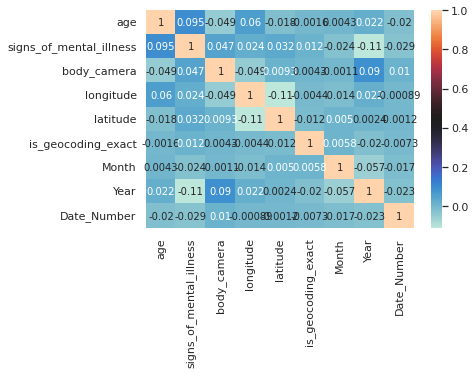

In [ ]:
palette = sns.color_palette('icefire',as_cmap=True)
sns.heatmap(df1.corr(),annot=True,cmap=palette)


OBSERVATIONS:

*   There's very little correlation between all the columns.



In [ ]:
preprocessing_data.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact', 'Month',
       'Year', 'Month_Name', 'Month_Number', 'Day', 'Yearly_Quarters',
       'Date_Number', 'Date_Category', 'race_name'],
      dtype='object')

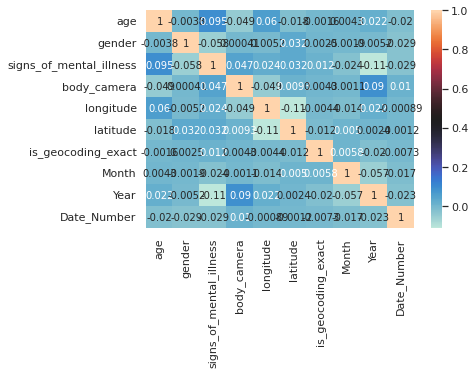

In [ ]:
palette = sns.color_palette('icefire',as_cmap=True)
sns.heatmap(preprocessing_data.corr(),annot=True,cmap=palette)

## MANNER OF DEATH

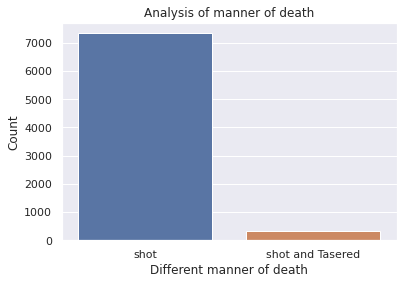

In [ ]:
sns.countplot(x='manner_of_death',data=df1)
plt.title("Analysis of manner of death")
plt.xlabel("Different manner of death")
plt.ylabel("Count")
plt.show()

OBSERVATIONS:


*   Mostly people were shot rather than shot and tasered.
*   We dont know whether the people were fleeing while they were being shot or tasered.
*   Hence we can't conclude any solid conclusion only from this graph



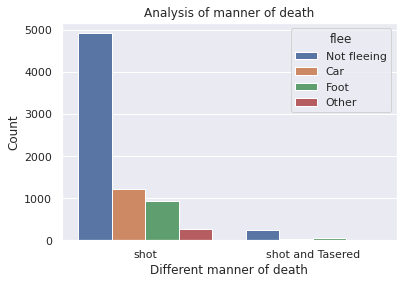

In [ ]:
sns.countplot(x='manner_of_death',data=df1,hue='flee')
plt.title("Analysis of manner of death")
plt.xlabel("Different manner of death")
plt.ylabel("Count")
plt.show()

OBSERVATIONS:


*   Most of the people were not fleeing when they were shot dead.
*   Others were fleeing away in car followed by foot.



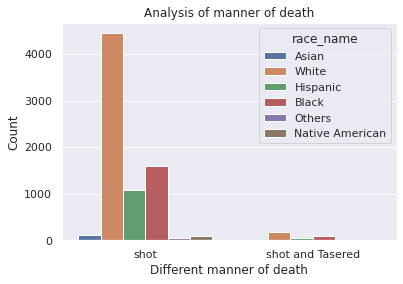

In [ ]:
sns.countplot(x='manner_of_death',data=df1,hue='race_name')
plt.title("Analysis of manner of death")
plt.xlabel("Different manner of death")
plt.ylabel("Count")
plt.show()

OBSERVATIONS:


*  White people were shot the most followed by Black and Hispanic respectively.
*  The amount of Asian , Native American and Others who were Shot and Tasered are almost null.

## ARMED OR NOT?

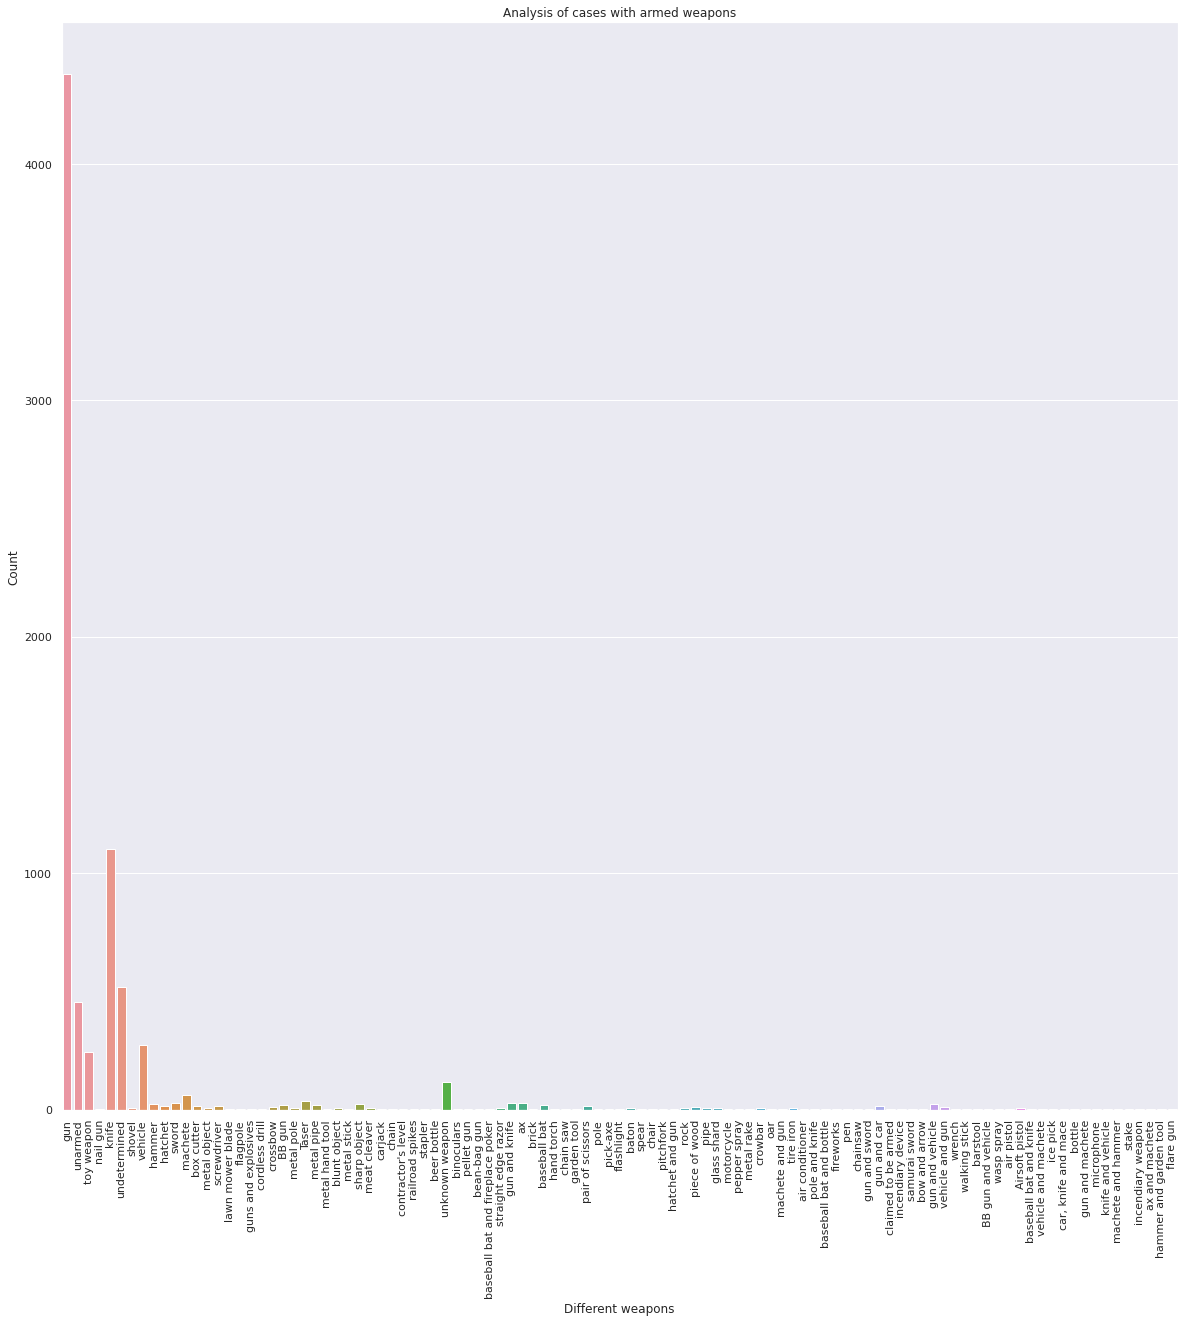

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='armed',data=df1)
plt.title("Analysis of cases with armed weapons")
plt.xlabel("Different weapons")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:


*  Maximum no. of people were armed.
*  Most of them were armed with guns(4379) followed by knife(1104).
*  There were total 103 different types of weapons used.

In [ ]:
weapons = df1['armed'].value_counts()

weapons

gun                    4379
knife                  1104
undetermined            518
unarmed                 454
vehicle                 275
                       ... 
claimed to be armed       1
bean-bag gun              1
binoculars                1
stapler                   1
flare gun                 1
Name: armed, Length: 103, dtype: int64

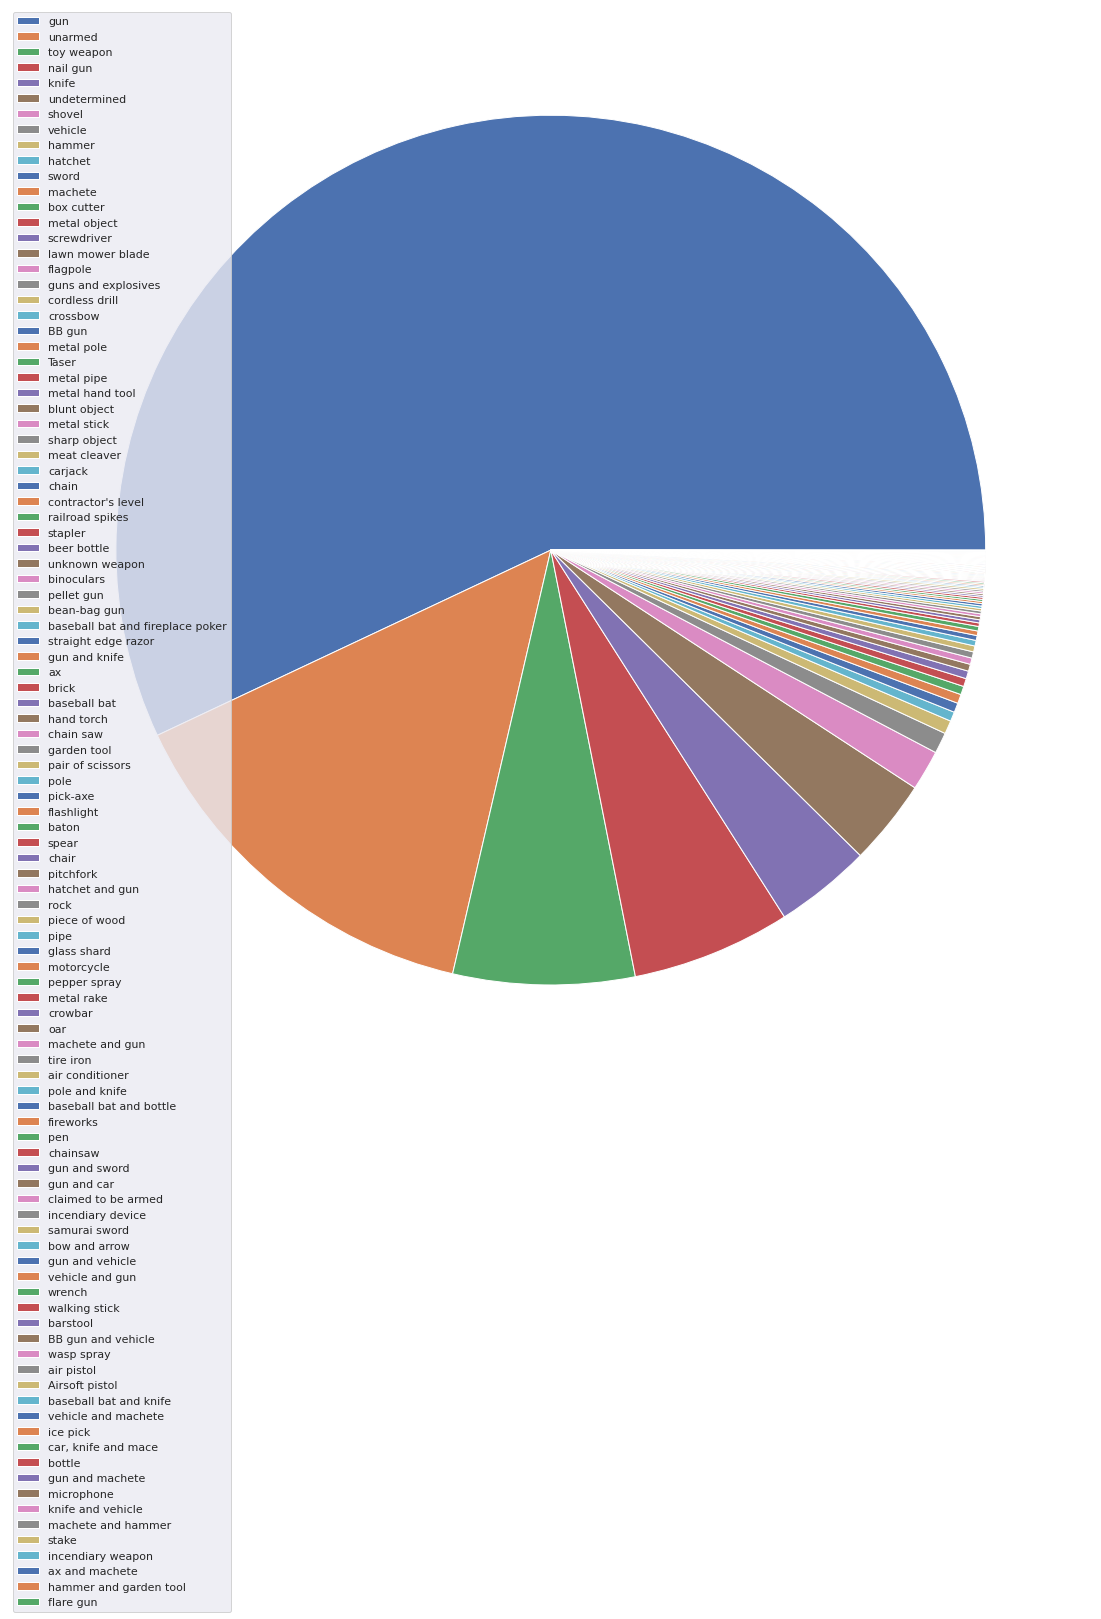

In [ ]:
plt.figure(figsize=(20,20))

df2 = pd.DataFrame(df1['armed'].value_counts())
mylabels = df1['armed'].unique()
plt.pie(df2)
plt.legend(labels=mylabels)
plt.show()


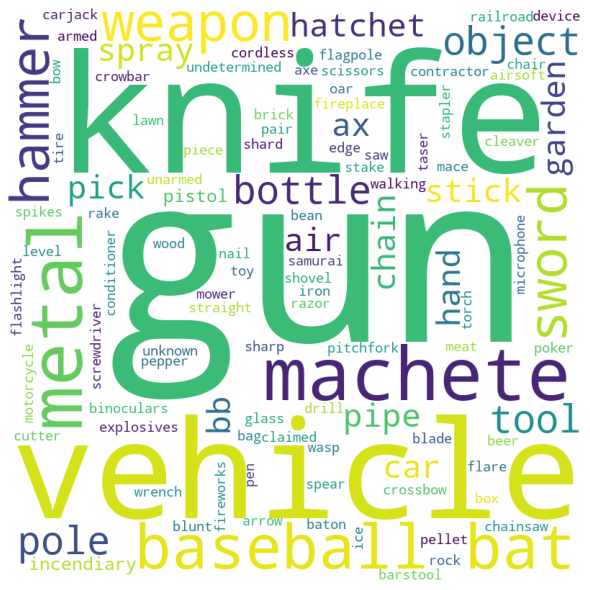

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
df5 = df1['armed'].unique()
armed_words = ''
for val in df5:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    armed_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(armed_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## AGE


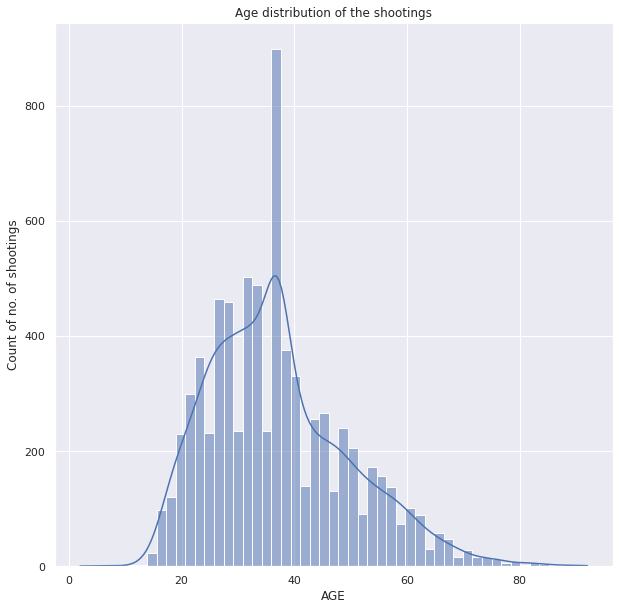

In [ ]:

plt.figure(figsize=(10,10))
sns.histplot(data=df1,x='age',kde=True)
plt.title("Age distribution of the shootings")
plt.xlabel("AGE")
plt.ylabel("Count of no. of shootings")
plt.show()


OBSERVATIONS:


*  Most of the people were young.
*  The graph is slightly positively skewed. Most of the people's age lie between 20-45

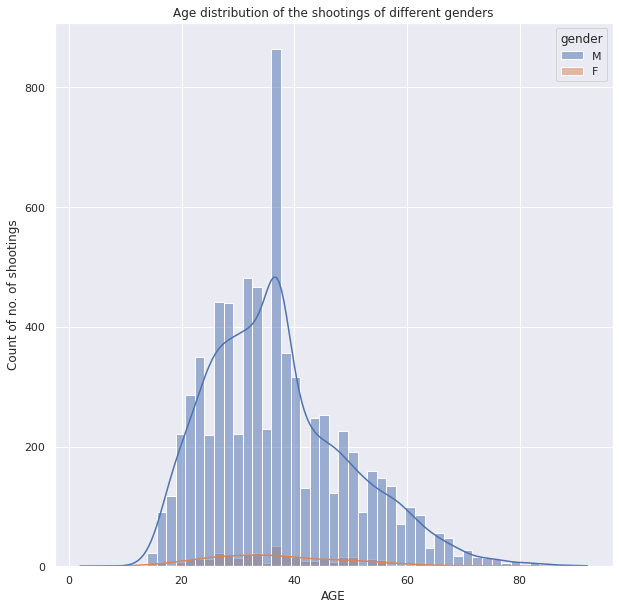

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df1,x='age',kde=True,hue='gender')
plt.title("Age distribution of the shootings of different genders")
plt.xlabel("AGE")
plt.ylabel("Count of no. of shootings")
plt.show()

OBSERVATIONS:


*  There's difference between male and female graph.
*  The graph is slightly positively skewed. Most of the male people's age lie between 20-45.
* Whereas in female , age is uniformly distributed throughout the graph.

In [ ]:
df_age = df1.groupby(by=['state']).mean()[['age']].reset_index()
fig = px.choropleth(df_age,
                    locations='state',
                    locationmode="USA-states",
                    color='age',
                    color_continuous_scale="inferno",
                    scope="usa",
                    title="MEAN AGE IN EACH STATE")
fig.show()

## GENDER

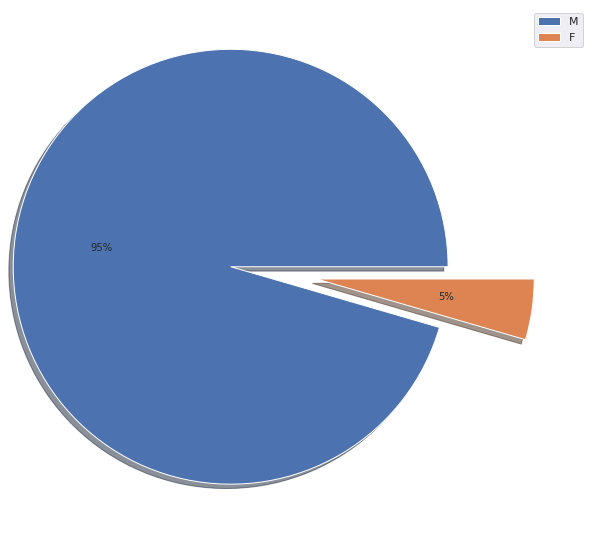

In [ ]:
plt.figure(figsize=(10,10))

df2 = pd.DataFrame(df1['gender'].value_counts())
mylabels = df1['gender'].unique()
myexplode = [0.4, 0]
plt.pie(df2,explode=myexplode,shadow=True,autopct='%.0f%%')
plt.legend(labels=mylabels)
plt.show()

OBSERVATIONS:


*  Upto 95% of the people were Male.
*  Only 5% of the people were Female.
*  Whereas in US there's 98 Male for every 100 Female.

## RACE

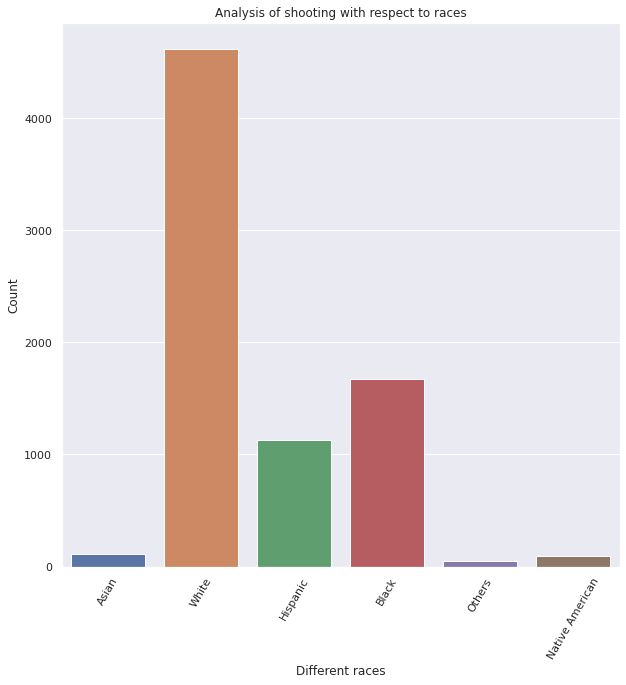

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='race_name',data=df1)
plt.title("Analysis of shooting with respect to races")
plt.xlabel("Different races")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

OBSERVATIONS:


*  White people were shot the most.
*  Black people were second followed by Hispanic.

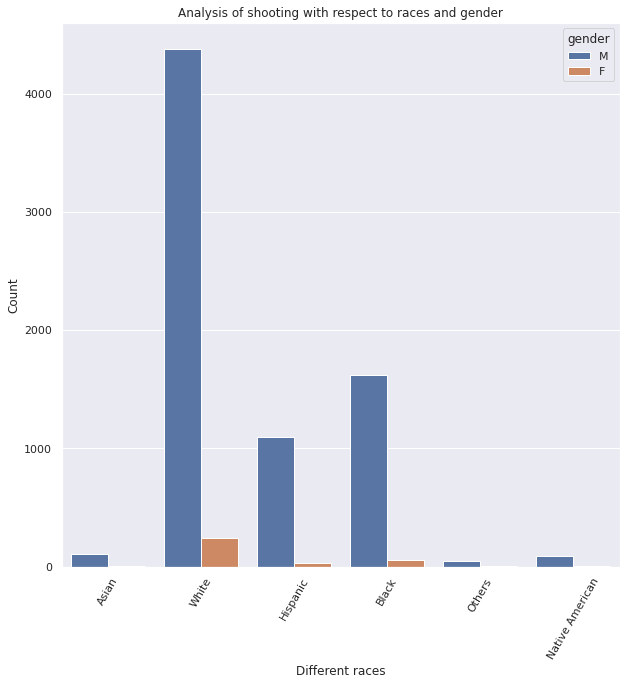

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='race_name',data=df1, hue='gender')
plt.title("Analysis of shooting with respect to races and gender")
plt.xlabel("Different races")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

OBSERVATIONS:


*  There are almost no female Asian and Native American who were shot dead.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

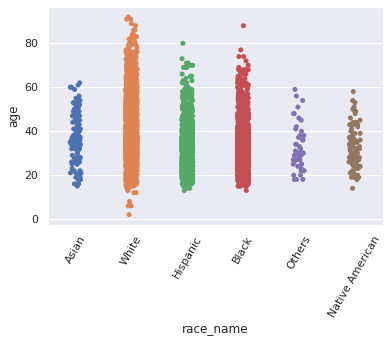

In [ ]:
sns.stripplot(df1['race_name'], df1['age'], jitter=True)
plt.xticks(rotation=60)

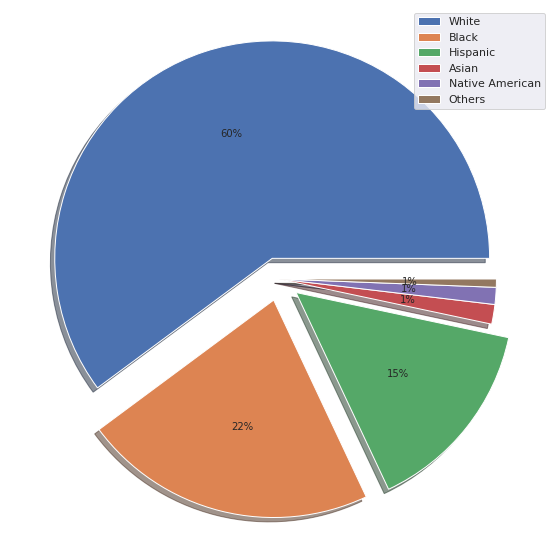

In [ ]:
plt.figure(figsize=(20,10))

df2 = pd.DataFrame(df1['race_name'].value_counts())
mylabels = ['White','Black','Hispanic','Asian','Native American','Others']
myexplode = [0.1, 0.1, 0.1, 0.0, 0.0, 0.0]
plt.pie(df2,explode=myexplode,shadow=True,autopct='%.0f%%')
plt.legend(labels=mylabels)
plt.show()

In [ ]:
df2

,race_name
White,4621
Black,1678
Hispanic,1127
Asian,112
Native American,97
Others,47


OBSERVATIONS:


*  Upto 60% were White.
*  22% were Black and 15% were Hispanic.
*  We can't conclude from this graph that the police were not racially biased.
*  We will have to check for the people who were unarmed and not fleeing.

Is race really the problem?

Count of those who where unarmed and Not fleeing based on Race

In [ ]:
df3 = df1[df1['flee'] == 'Not fleeing' ][df1['armed']=='unarmed']['race_name'].value_counts()
df3

White              132
Black               72
Hispanic            43
Others               4
Asian                4
Native American      3
Name: race_name, dtype: int64

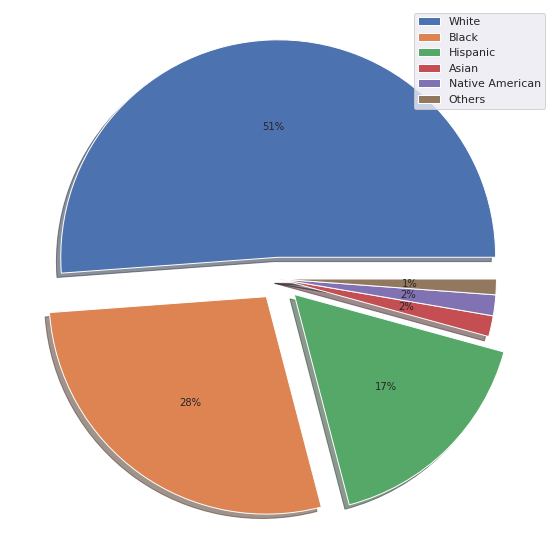

In [ ]:
plt.figure(figsize=(20,10))

df2 = pd.DataFrame(df3)
mylabels = ['White','Black','Hispanic','Asian','Native American','Others']
myexplode = [0.1, 0.1, 0.1, 0.0, 0.0, 0.0]
plt.pie(df2,explode=myexplode,shadow=True,autopct='%.0f%%')
plt.legend(labels=mylabels)
plt.show()

OBSERVATIONS:


*  Upto 51% are White.
*  28% are Black and 17% are Hispanic.
*  It is almost similar to the original graph so we can say that police was not racially biased.

## VISUALIZATION OF SHOOTINGS THROUGHOUT THE USA

In [ ]:
import plotly.graph_objects as go
df1['city_state'] =  df1['city'] +','+ df1['state']

fig = go.Figure(data=go.Scattergeo(
        lon = df1['longitude'],
        lat = df1['latitude'],
        text = df1['city_state'],
        mode = 'markers',
        ))
fig.update_layout(
        title = 'SHOOTINGS OCCURED AT THESE PARTICULAR REGIONS',
        geo_scope='usa',
    )
fig.show()

OBSERVATIONS:


*  It shows the exact location where the shootings have occured.
*  We observe that the shootings have occured mostly in the eastern region of the country because the population is much higher in that area.

## SIGNS OF MENTAL ILLNESS

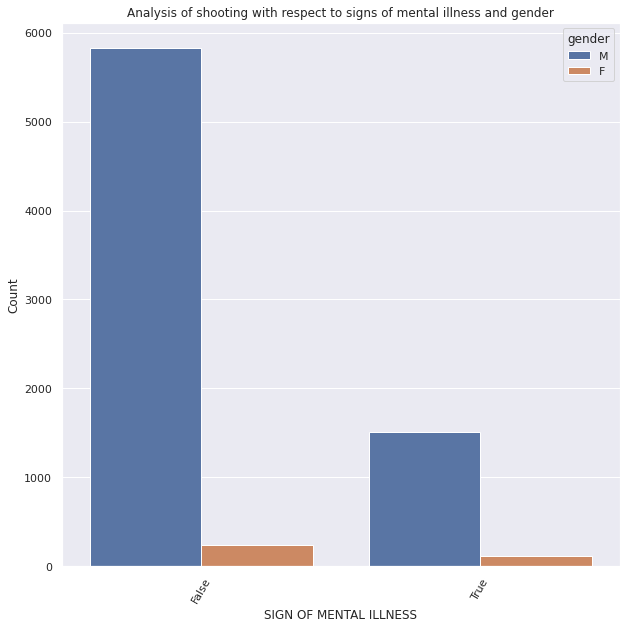

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='signs_of_mental_illness',data=df1, hue='gender')
plt.title("Analysis of shooting with respect to signs of mental illness and gender")
plt.xlabel("SIGN OF MENTAL ILLNESS")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

OBSERVATIONS:


*  There's no major showing of mental illness.



## THREAT LEVEL

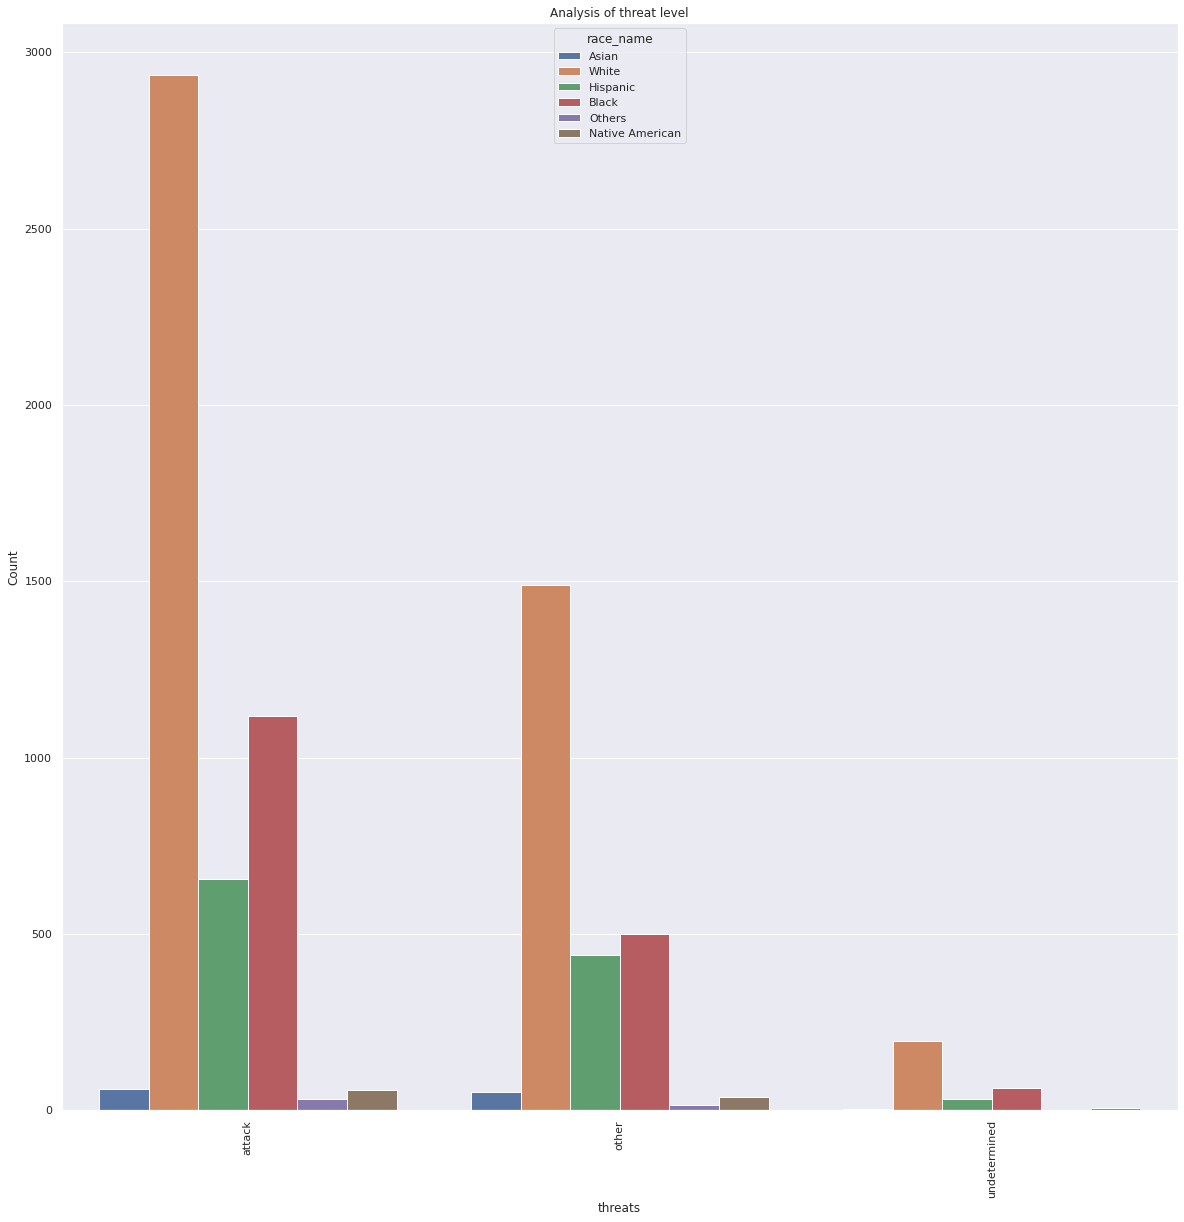

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='threat_level',data=df1,hue='race_name')
plt.title("Analysis of threat level")
plt.xlabel("threats")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:


*  Data shows that most of the police officers were attacked.
*  Police were mostly attacked by White people.


## FLEE OR NOT

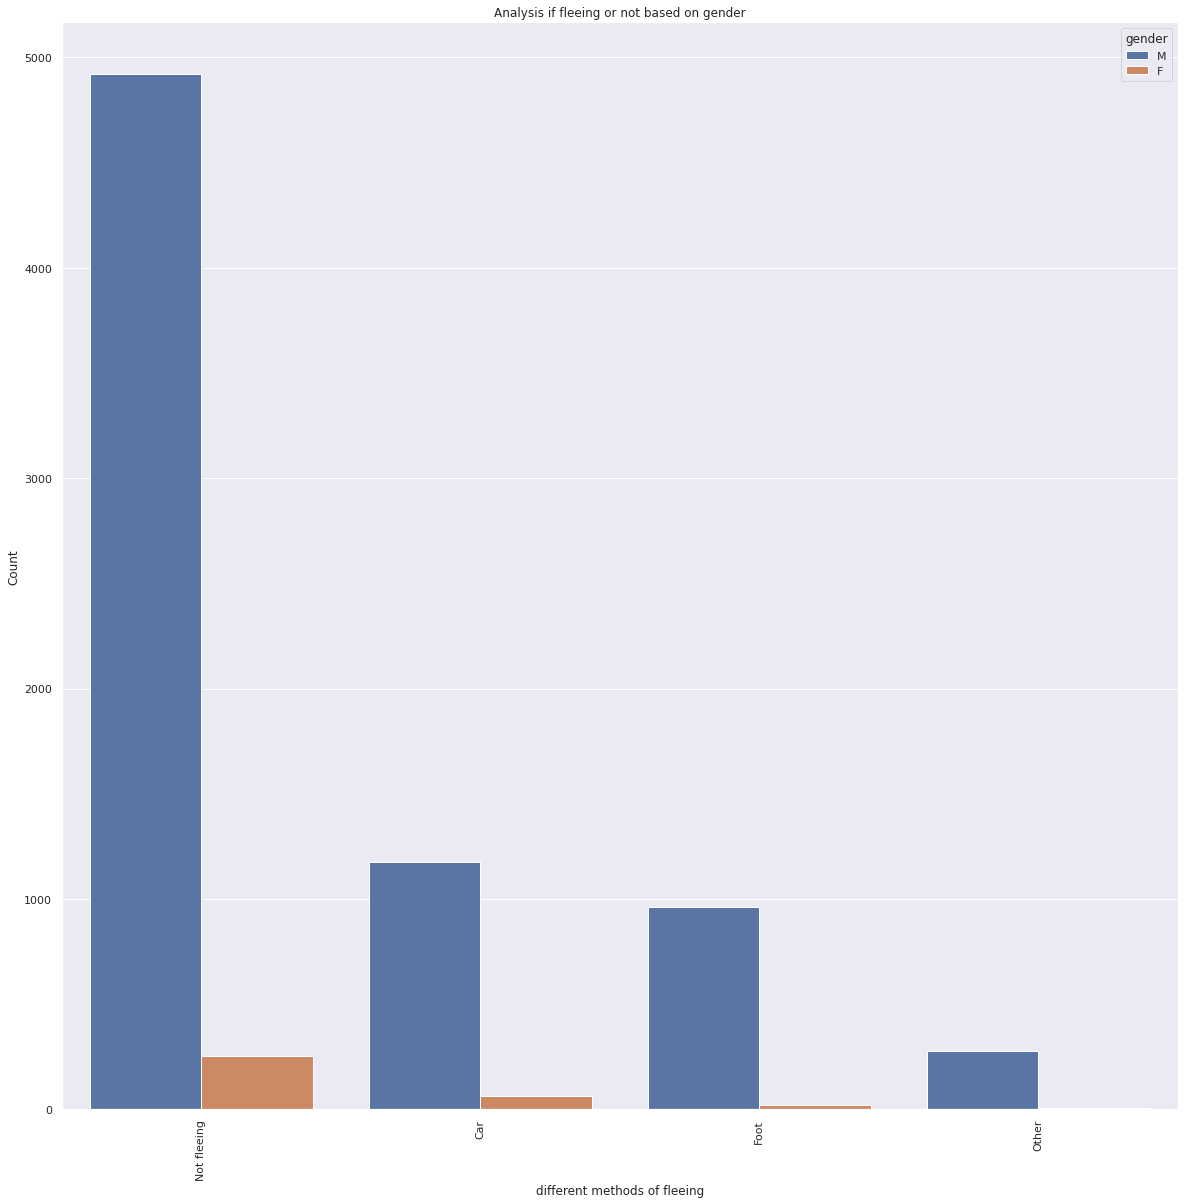

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='flee',data=df1,hue='gender')
plt.title("Analysis if fleeing or not based on gender")
plt.xlabel("different methods of fleeing")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:


*  Majority of the people were not fleeing but they were still shot dead.
*  Most used means of fleeing were car and bare foot.


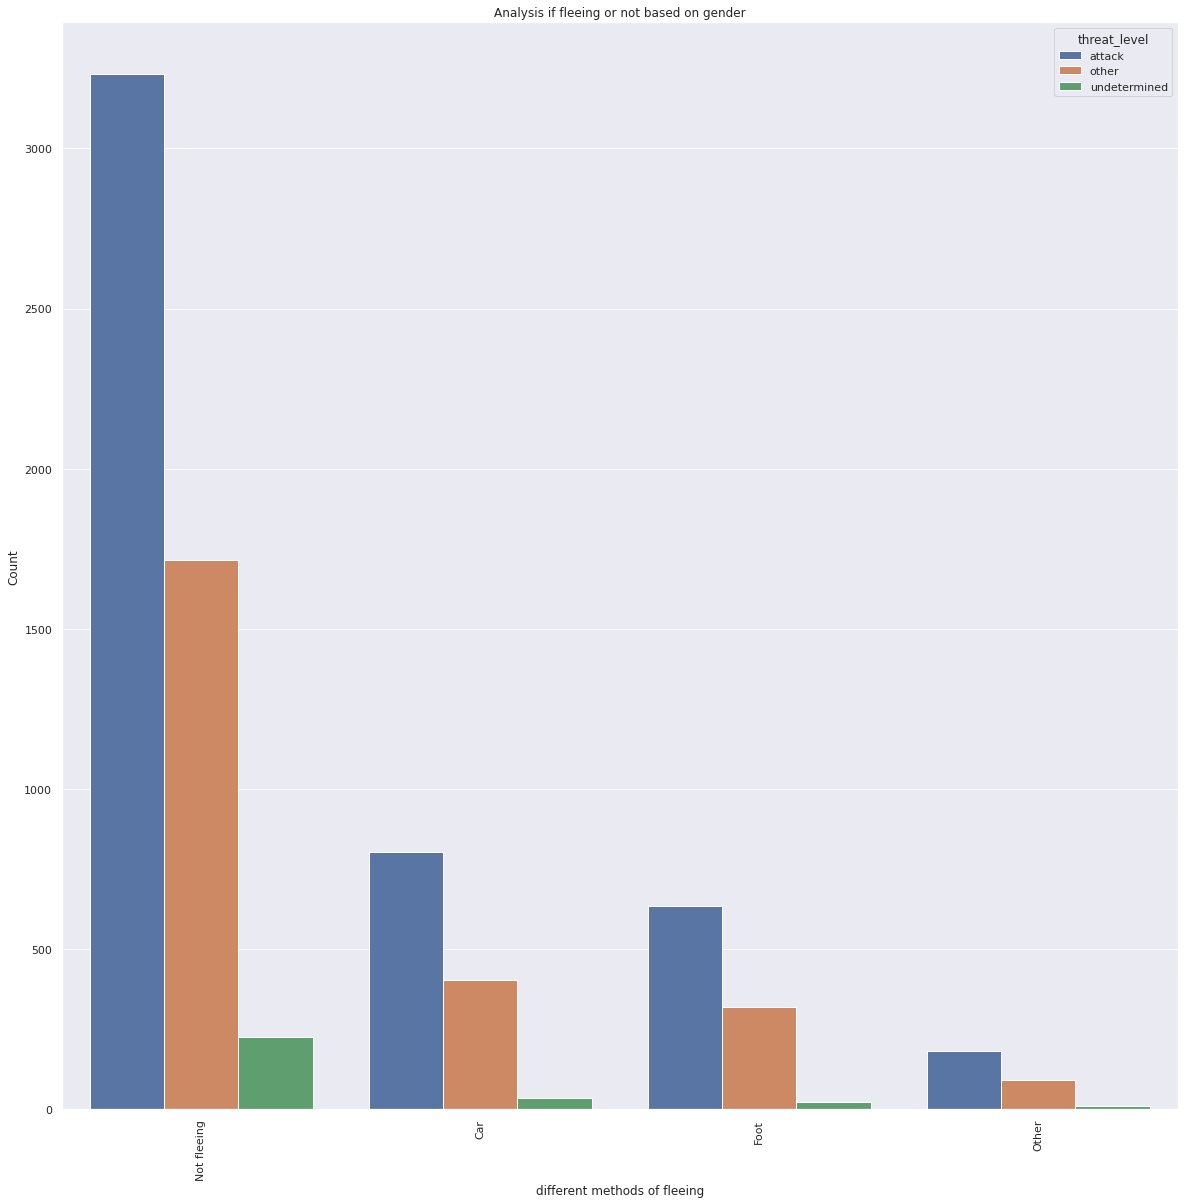

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x='flee',data=df1,hue='threat_level')
plt.title("Analysis if fleeing or not based on gender")
plt.xlabel("different methods of fleeing")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:


*  Majority of the people who were not fleeing tried to attack the police and hence were shot by them .
*  Others who were fleeing by car or barefoot mostly attacked the police.

## YEARLY VISUALIZATION OF SHOOTING

In [ ]:
yr_st = df1.groupby(by=['Year','state']).count().date
yr_st = yr_st.reset_index()
yr_st.columns = ['Year','State','Count']

In [ ]:
fig = px.choropleth(yr_st,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="inferno",
                    scope="usa",
                    animation_frame='Year',
                    title="SHOOTINGS OVER THE YEAR")
fig.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the years.
*  Over the years most shootings have occured in the State of California.
*  The highest shootings have occured in the year 2015 in the State of California(190).


## MONTHLY VISUALIZATION OF SHOOTINGS

In [ ]:
mnt_st = df1.groupby(by=['Month','state']).count().date
mnt_st = mnt_st.reset_index()
mnt_st.columns = ['Month','State','Count']

In [ ]:
fig = px.choropleth(mnt_st,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="magma",
                    scope="usa",
                    animation_frame='Month',
                    title="SHOOTINGS OVER THE MONTHS")
fig.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the months.
*  The highest shootings have occured in the month of August in the State of California(108).
*  No Shootings have occured in the Months:
                      MONTHS - STATE
                      1. May - Iowa
                      2. June - Vermont
                      3. July - Nebraska
                      4. August - Maine
                      5. October - Wyoming
                      6. November - North Dakota,Connecticut,Vermont
                      7. December - North Dakota  




## DAILY VISUALIZATION OF SHOOTINGS

In [ ]:
dt_st = df1.groupby(by=['Day','state']).count().date
dt_st = dt_st.reset_index()
dt_st.columns = ['Day','State','Count']

In [ ]:
fig = px.choropleth(dt_st,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="magma",
                    scope="usa",
                    animation_frame='Day',
                    title="SHOOTINGS OVER THE DAYS")
fig.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the days.
*  There's only one weekday i.e. Monday when the Shooting have not occured in the state - South Dakota.
*  The highest shootings have occured in Thursday in the State of California(189).


## SHOOTINGS OVER THE YEARS

In [ ]:
yr = df1.groupby(by=['Year']).count().date
yr = yr.reset_index()
yr.columns = ['Year','Count']

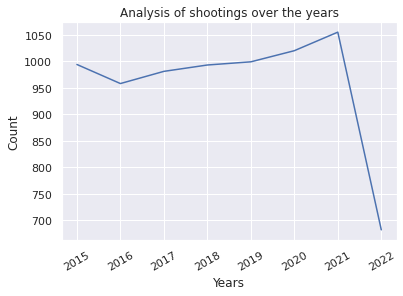

In [ ]:
sns.lineplot(x="Year", y="Count", data=yr)
plt.title("Analysis of shootings over the years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the Years.
*  We will ignore the graph after 2022 because when this dataset was obtained , year 2022 is not fully finished.
*  There's been a drop in shootings from year 2015 to 2016.
*  The graph has linearly increased from year 2016 onwards till 2021.
*  Highest no. of shootings has occured in the year 2021.
*  Least no. of shootings has occured in the year 2016.

## SHOOTINGS OVER THE MONTHS

In [ ]:
mnt = df1.groupby(by=['Month_Name']).count().date
mnt = mnt.reset_index()
mnt.columns = ['Month','Count']

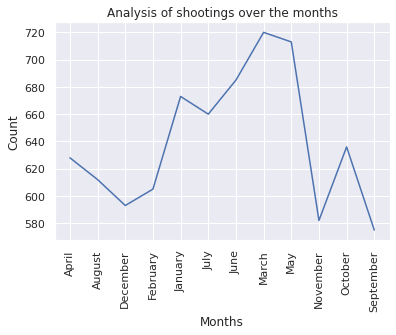

In [ ]:
sns.lineplot(x="Month", y="Count", data=mnt)
plt.title("Analysis of shootings over the months")
plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the months.
*  Most shootings occur in the month of March , May and June.
*  September has the least no. of shootings.


## SHOOTINGS OVER THE DAYS

In [ ]:
 dy= df1.groupby(by=['Day']).count().date
 dy= dy.reset_index()
 dy.columns = ['Days','Count']

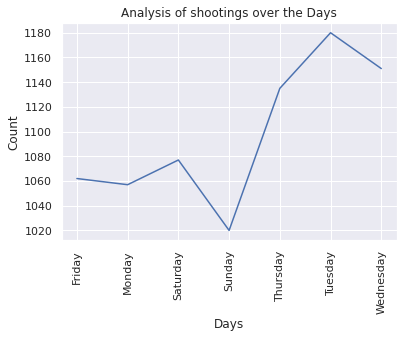

In [ ]:
sns.lineplot(x="Days", y="Count", data=dy)
plt.title("Analysis of shootings over the Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the days.
*  It is seen that there is drop in shootings during the Weekends.
*  Most of the Shootings occur during the Weekdays.
*  Wednesday has the highest no. of shootings.


## SHOOTINGS OVER THE DATES OF MONTHS

In [ ]:
 dt_num= df1.groupby(by=['Date_Number']).count().date
 dt_num= dt_num.reset_index()
 dt_num.columns = ['Date_num','Count']

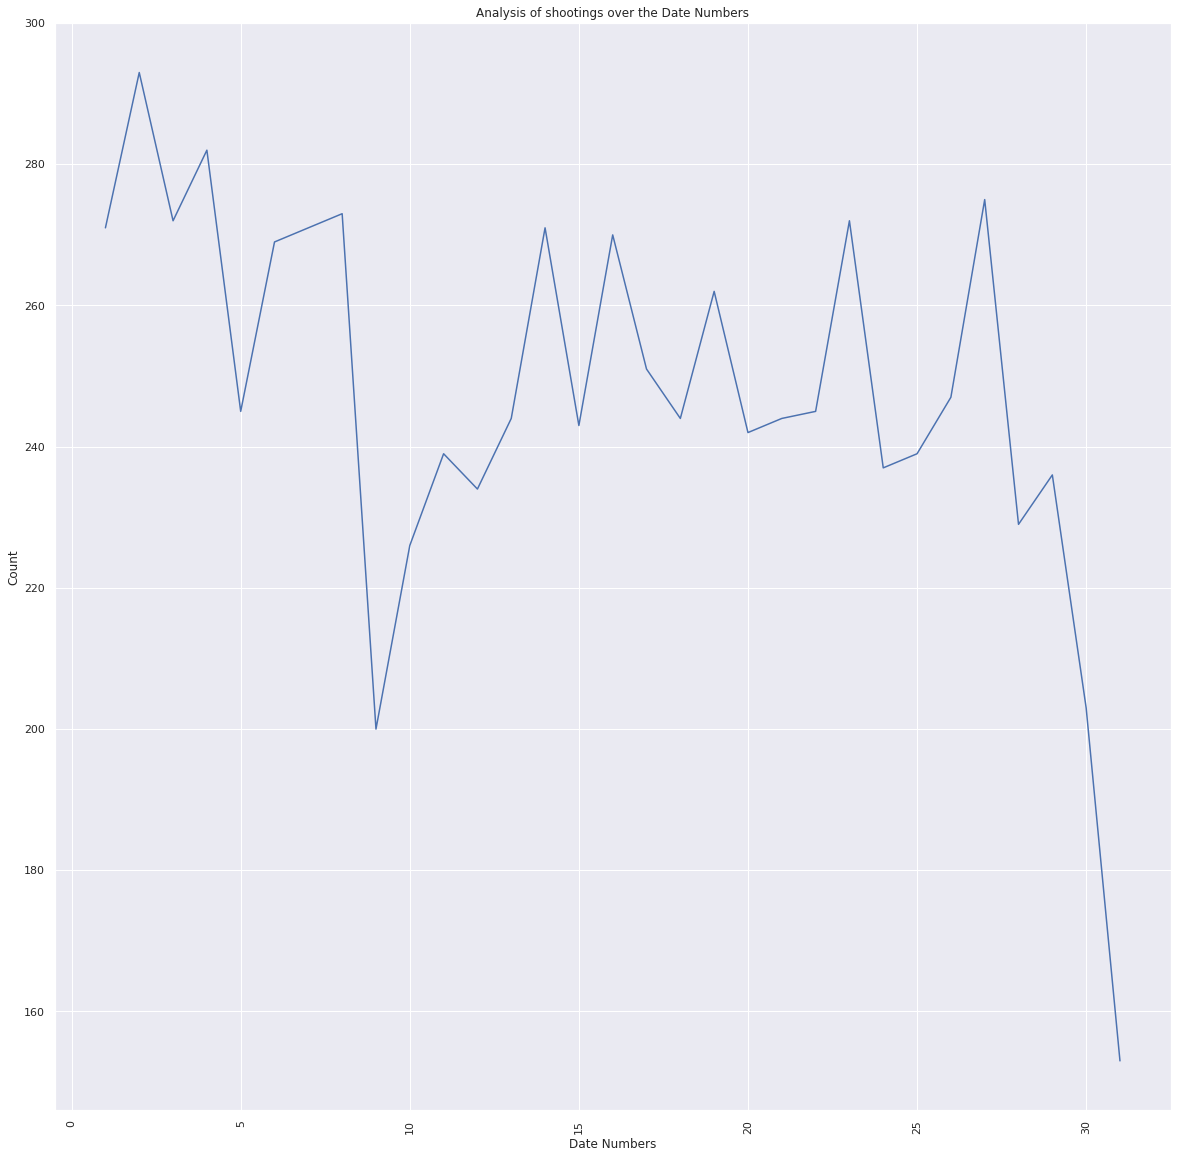

In [ ]:
plt.figure(figsize=(20,20))
sns.lineplot(x="Date_num", y="Count", data=dt_num)
plt.title("Analysis of shootings over the Date Numbers")
plt.xlabel("Date Numbers")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the dates of a month.
*  We'll ignore the date 31st because most of months dont have 31 days.
*  Highest no. of shootings has occured during the 5th day of the month.
*  Least no. of shootings has occured during the end of the month.


## STATE WISE SHOOTINGS OVER THE YEARS

In [ ]:
 yr_st= df1.groupby(by=['Year','state']).count().date
 yr_st= yr_st.reset_index()
 yr_st.columns = ['Years','State','Count']

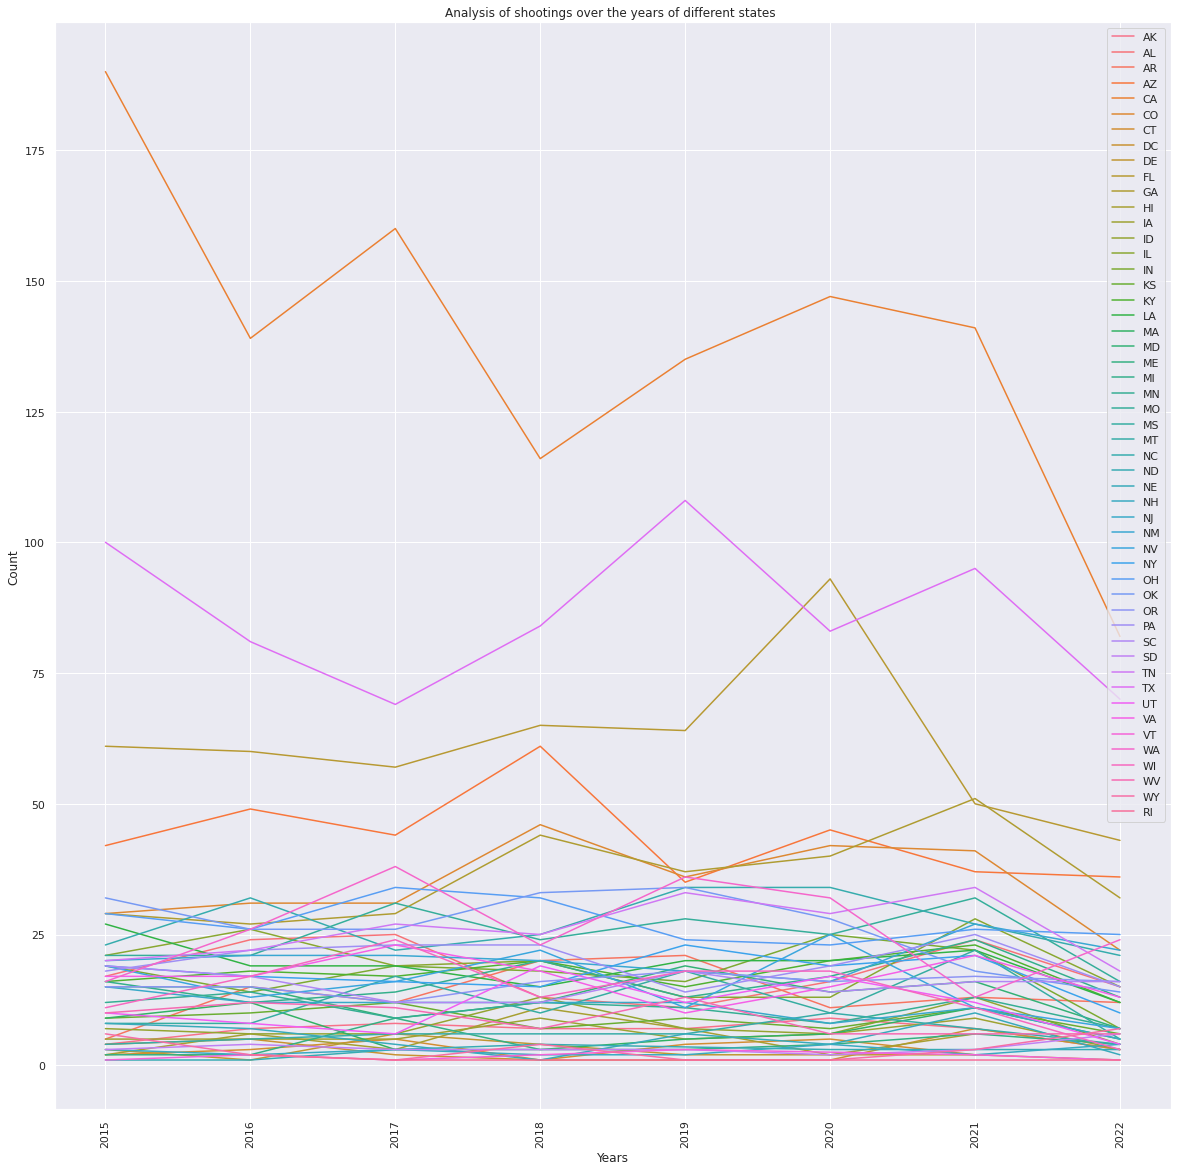

In [ ]:
plt.figure(figsize=(20,20))
sns.lineplot(x="Years", y="Count", data=yr_st,hue='State')
plt.title("Analysis of shootings over the years of different states ")
plt.xlabel("Years")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

OBSERVATIONS:

*  This graph shows the shootings throughout the States over the years.
*  We will ignore the graph after 2021 because when this dataset was obtained , year 2022 is not fully finished.
*  Clearly State of California and State of Texas has highest no. of shootings throughout the years.
*  State of California has highest shootings in the year 2015.


## RACE WISE SHOOTINGS OVER THE YEARS

In [ ]:
 rc_st= df1.groupby(by=['Year','race_name']).count().date
 rc_st= rc_st.reset_index()
 rc_st.columns = ['Years','Race','Count']

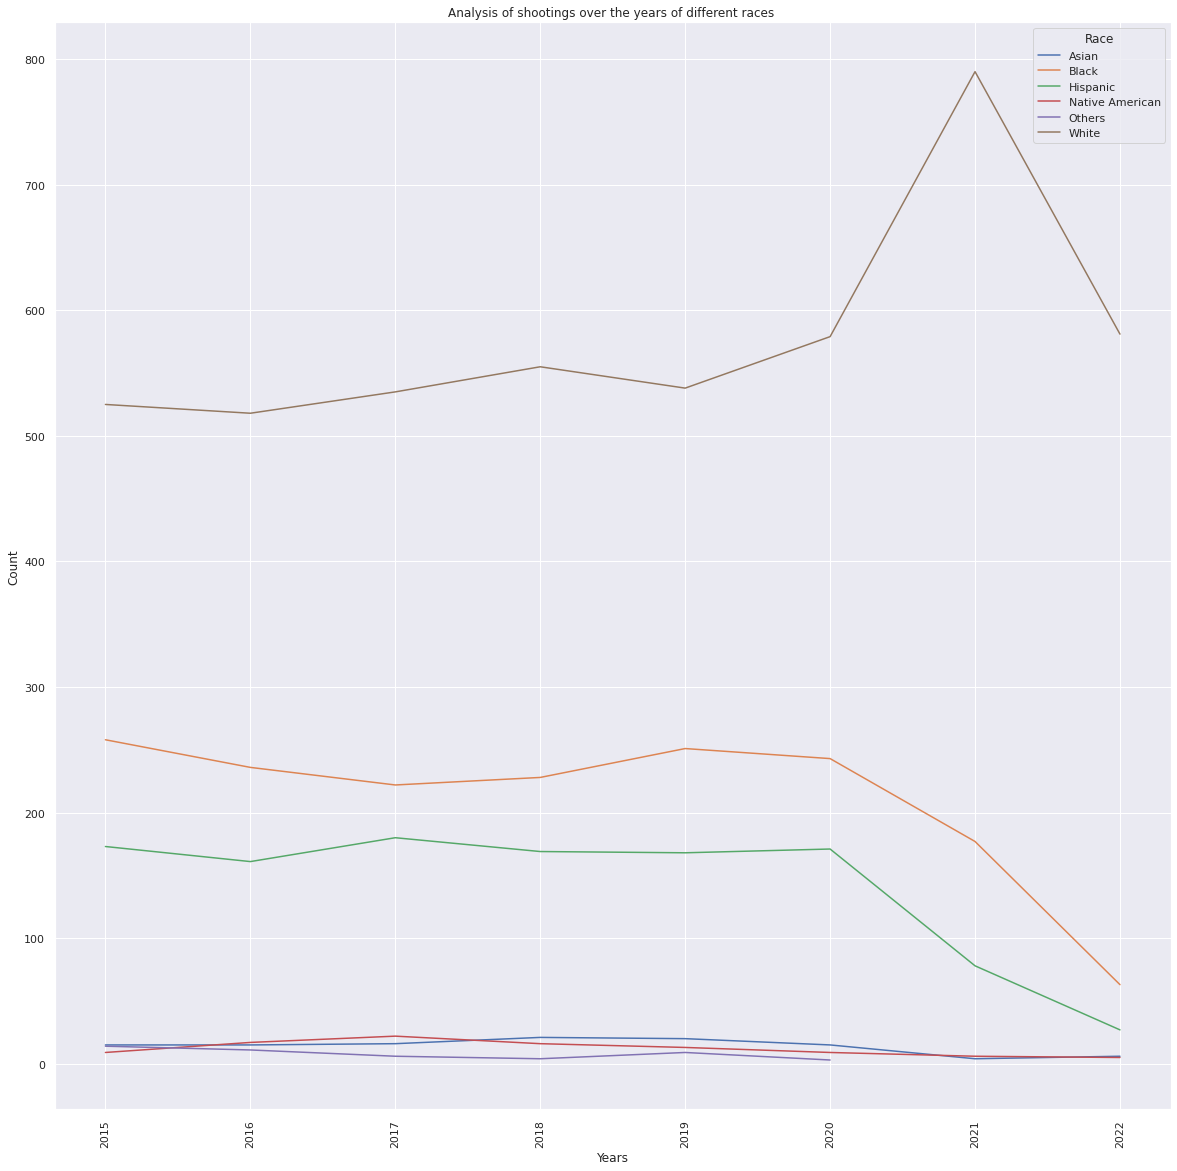

In [ ]:
plt.figure(figsize=(20,20))
sns.lineplot(x="Years", y="Count", data=rc_st,hue='Race')
plt.title("Analysis of shootings over the years of different races ")
plt.xlabel("Years")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:

*  This graph shows the shootings of different races over the Years.
*  We will ignore the graph after 2022 because when this dataset was obtained , year 2022 is not fully finished.
*  Clearly most of the shootings have been done of White race followed by Black and Hispanic.
*  In the year 2021 most White people were shot.
*  In the year 2015 most Black people were shot.


# **DIFFERENT MODELING TECHNIQUES**

In [ ]:
preprocessing_data.columns


Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact', 'Month',
       'Year', 'Month_Name', 'Month_Number', 'Day', 'Yearly_Quarters',
       'Date_Number', 'Date_Category', 'race_name'],
      dtype='object')

In [ ]:
usps["flee"].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

ENCODING THE DATA

In [ ]:
escape_type = list(usps['flee'].unique())

escape_type.remove('Not fleeing')

def escape(flee):
    if escape in escape_type:
        return 1
    else:
        return 0

preprocessing_data['flee'] = preprocessing_data['flee'].apply(escape)

Here we are taking all the not fleeing values as 0 and rest any mode of fleeing as 1

In [ ]:
weapons_type = list(usps['armed'].unique())

weapons_type.remove('unarmed')

def weapon(armed):
    if armed in weapons_type:
        return 1
    else:
        return 0

preprocessing_data['armed'] = preprocessing_data['armed'].apply(weapon)

Here we are taking all the unarmed values as 0 and rest any type of weapons as 1

In [ ]:
preprocessing_data['manner_of_death']= label_encoder.fit_transform(preprocessing_data['manner_of_death'])


In [ ]:
preprocessing_data.isna().sum()

date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  835
latitude                   835
is_geocoding_exact           0
Month                        0
Year                         0
Month_Name                   0
Month_Number                 0
Day                          0
Yearly_Quarters              0
Date_Number                  0
Date_Category                0
race_name                    0
dtype: int64

In [ ]:
preprocessed_data=preprocessing_data.loc[:,[ 'Month', 'Year','age', 'signs_of_mental_illness', 'flee','manner_of_death','armed']]
preprocessed_data.head()

,Month,Year,age,signs_of_mental_illness,flee,manner_of_death,armed
0,2,2015,53.0,1,0,0,1
1,2,2015,47.0,0,0,0,1
2,3,2015,23.0,0,0,1,0
3,4,2015,32.0,1,0,0,1
4,4,2015,39.0,0,0,0,1


CHECKING IF ALL THE DATA TYPES OF THE COLUMNS ARE IN FLOAT OR INTEGER FOR MODEL

In [ ]:
preprocessed_data.dtypes

Month                        int64
Year                         int64
age                        float64
signs_of_mental_illness      int64
flee                         int64
manner_of_death              int64
armed                        int64
dtype: object

In [ ]:
preprocessed_data.isna().sum()

Month                      0
Year                       0
age                        0
signs_of_mental_illness    0
flee                       0
manner_of_death            0
armed                      0
dtype: int64

## SCALING THE VALUES USING MINMAXSCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()


In [ ]:
scaler.fit(preprocessed_data.drop('armed',axis=1))

MinMaxScaler()

In [ ]:
scaled_features = scaler.transform(preprocessed_data.drop('armed',axis=1))

In [ ]:
scaled_features

array([[0.09090909, 0.        , 0.56666667, 1.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.        , 0.23333333, 0.        , 0.        ,
        1.        ],
       ...,
       [0.63636364, 1.        , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.63636364, 1.        , 0.39068886, 0.        , 0.        ,
        0.        ],
       [0.63636364, 1.        , 0.39068886, 0.        , 0.        ,
        0.        ]])

## SPLITTING THE VALUES OF TESTING AND TRAINING MODEL

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_features
y = preprocessed_data['armed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here we are splitting 30% of the data for testing model and rest 70% for training model.

## REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.94      1.00      0.97      2161

    accuracy                           0.94      2305
   macro avg       0.47      0.50      0.48      2305
weighted avg       0.88      0.94      0.91      2305

[[   0  144]
 [   0 2161]]


THE ACCURACY FROM THIS PREDICTION MODEL IS 94%.

## DECISION TREE CLASSIFICATION MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  23  121]
 [ 165 1996]]


              precision    recall  f1-score   support

           0       0.12      0.16      0.14       144
           1       0.94      0.92      0.93      2161

    accuracy                           0.88      2305
   macro avg       0.53      0.54      0.54      2305
weighted avg       0.89      0.88      0.88      2305



THE ACCURACY FROM THIS MODEL IS 87%.

## KNN CLASSIFICATION MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction = knc.predict(X_test)

In [ ]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  23  121]
 [ 165 1996]]


              precision    recall  f1-score   support

           0       0.12      0.16      0.14       144
           1       0.94      0.92      0.93      2161

    accuracy                           0.88      2305
   macro avg       0.53      0.54      0.54      2305
weighted avg       0.89      0.88      0.88      2305



THE ACCURACY FROM THIS MODEL IS 87%.

## RANDOM FOREST CLASSIFICATION MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=180)
clf.fit(X_train,y_train)
y_pred_test=clf.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_test))

0.9206073752711497


THE ACCURACY FROM THIS MODEL IS 92%.

# **CONCLUSION**



*   THERE IS NO RACISM.
*   SOME OF THE POLICE SHOOTINGS ARE NOT JUSTIFIED.
*   THERE ARE FEW POLICE OFFICERS WHO ARE USING THERE POST IN WRONG WAY AND     BECAUSE OF WHICH OTHERS CAN LOOK GUILTY.
*   SHOOTING OF 2YR OLD BABY WHO IS UNARMED IS NOT JUSTIFIED.
*   GOVERNMENT SHOULD ALSO TAKE STRICT ACTIONS AGAINST THE ILLEGAL PURCHASE OF GUNS BY UNDERAGE KIDS.
*   WHY WAS A 84 YR OLD WOMEN SHOT WHEN SHE WAS UNARMED AND CAN BE EASILY ARRESTED WHILE ATTACKING?
*   THESE UNJUSTIFIED SHOOTINGS CAN BE STOPPED ONLY IF THE POLICE KNEW WHO ALL ARE USING THEIR AUTHORITY TO TAKE SOMEONE'S LIFE UNFAIRLY.

